In [1]:
import cv2
import pandas as pd
import mediapipe
import numpy as np 

In [2]:
file_path = './gesture_data.csv'
df = pd.read_csv(file_path)

# 데이터프레임의 첫 몇 행 출력
print(df.head())

         x0        x4        x8       x12       x16       x20        x1  \
0  0.277464  0.877000  0.317519  0.719964  0.401329  0.518816  0.280987   
1  0.340227  0.912002  0.390683  0.751882  0.468232  0.538832  0.329557   
2  0.420231  0.909485  0.477216  0.738171  0.554410  0.528361  0.419768   
3  0.534325  0.937425  0.601910  0.751966  0.687587  0.552096  0.548888   
4  0.682761  0.932611  0.777864  0.752820  0.845555  0.561700  0.718909   

         x5        x9       x13  ...        y8       y12       y16       y20  \
0  0.465393  0.302621  0.779161  ...  0.848961  0.344541  0.673872  0.302248   
1  0.483095  0.367574  0.813311  ...  0.884676  0.409610  0.699558  0.362740   
2  0.458505  0.456633  0.807045  ...  0.881498  0.493068  0.693846  0.447064   
3  0.480666  0.590197  0.826816  ...  0.906934  0.611175  0.718429  0.561521   
4  0.483907  0.759807  0.833473  ...  0.898515  0.760746  0.720564  0.716200   

         y1        y5        y9       y13       y17  gesture  
0  0.

In [3]:
# 결측값 확인
print(df.isnull().sum())

# 결측값 제거 (필요한 경우)
df = df.dropna()

# 특징(feature)과 레이블(label) 분리
X = df.drop('gesture', axis=1)
y = df['gesture']

# 레이블 인코딩 (문자형 레이블을 숫자로 변환)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

x0         0
x4         0
x8         0
x12        0
x16        0
x20        0
x1         0
x5         0
x9         0
x13        0
x17        0
y0         0
y4         0
y8         0
y12        0
y16        0
y20        0
y1         0
y5         0
y9         0
y13        0
y17        0
gesture    0
dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 모델 리스트 정의
models = {
    'Random Forest': RandomForestClassifier(random_state=93),
    'Decision Tree': DecisionTreeClassifier(random_state=93),
    'SVM': SVC(random_state=93),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=93)
}

# 하이퍼파라미터 그리드 정의
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10]}
}


In [6]:
best_models = {}
best_scores = {}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝 및 모델 학습
for model_name in models:
    print(f'{model_name} 훈련 시작')
    model = models[model_name]
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best cross-validation score for {model_name}: {grid_search.best_score_}')


Random Forest 훈련 시작
Best parameters for Random Forest: {'n_estimators': 100}
Best cross-validation score for Random Forest: 0.95
Decision Tree 훈련 시작
Best parameters for Decision Tree: {'max_depth': None}
Best cross-validation score for Decision Tree: 0.8482142857142858
SVM 훈련 시작
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.9892857142857142
Logistic Regression 훈련 시작
Best parameters for Logistic Regression: {'C': 10}
Best cross-validation score for Logistic Regression: 0.9339285714285716



Random Forest Classifier:
Accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.96      1.00      0.98        22
           2       0.95      0.95      0.95        21
           3       1.00      1.00      1.00        22
           4       0.87      1.00      0.93        13
           5       0.94      0.89      0.91        18
           6       1.00      0.95      0.98        22

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.97      0.96      0.96       140



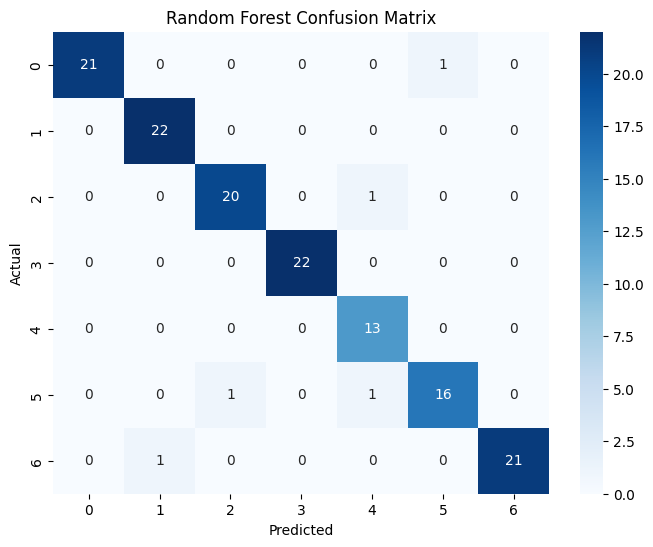


Decision Tree Classifier:
Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.95      0.95      0.95        22
           2       0.91      1.00      0.95        21
           3       0.95      0.91      0.93        22
           4       1.00      0.92      0.96        13
           5       0.83      0.83      0.83        18
           6       0.88      1.00      0.94        22

    accuracy                           0.93       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.93      0.93      0.93       140



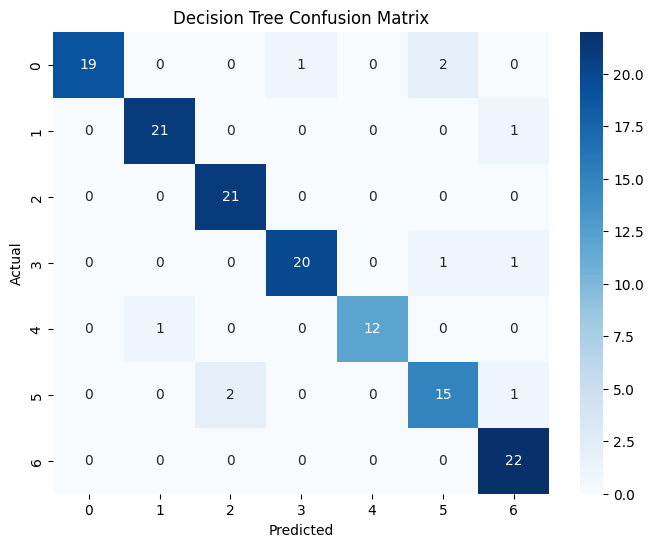


SVM Classifier:
Accuracy: 0.9785714285714285
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       1.00      1.00      1.00        22
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        13
           5       0.94      0.94      0.94        18
           6       1.00      1.00      1.00        22

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



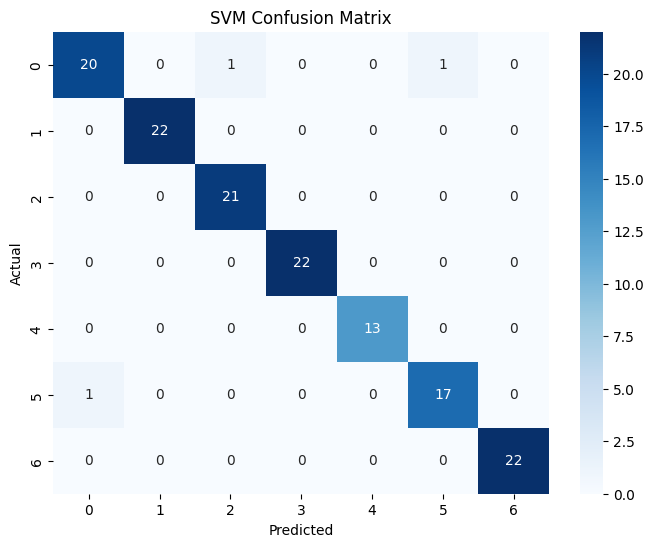


Logistic Regression Classifier:
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       1.00      1.00      1.00        22
           2       0.91      0.95      0.93        21
           3       1.00      1.00      1.00        22
           4       1.00      0.92      0.96        13
           5       0.83      0.83      0.83        18
           6       0.96      1.00      0.98        22

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



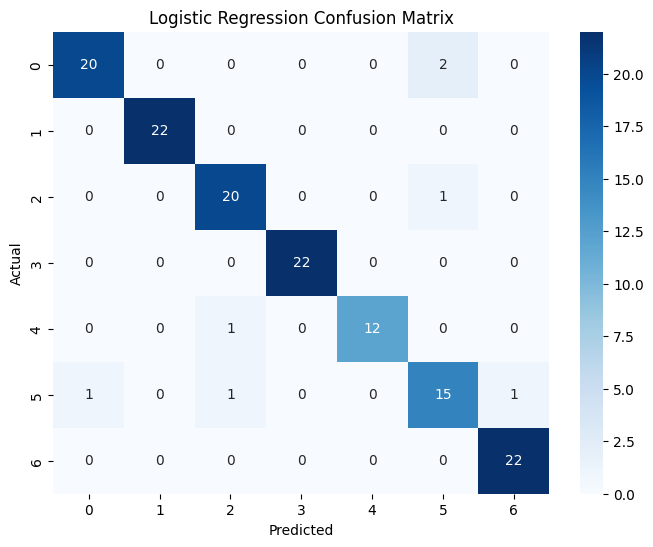

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터에 대해 최적의 모델 평가
for model_name in best_models:
    model = best_models[model_name]
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classifier:")
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

    # confusion_matrix 시각화
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [9]:
import pickle

# 최적의 모델 선택 (예: SVM 모델)
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

# 모델 저장
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"모델 저장 완료: {best_model_name}")

모델 저장 완료: SVM
